# US Accidents Exploratory Data Analysis

TODO - talk about the dataset (source, what it contains, how it will be useful)
- Kaggle
- US Accidents (2 million records -- updated)
A Countrywide Traffic Accident Dataset (2016 - 2020)
- informaiton about accidents
- can use useful to prevent accidents


In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arbaj1shaikh
Your Kaggle Key: ········


  0%|                                                                                       | 0.00/117M [00:00<?, ?B/s]

100%|███████████████████████████████████████████████████████████████████████████████| 117M/117M [24:15<00:00, 84.6kB/s]


In [2]:
data_filename = "C:/Users/arbaj/Untitled Folder/us-accidents/US_Accidents_Dec20_updated.csv"

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(data_filename)

In [5]:
df.head(5)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [9]:
df.shape

(1516064, 47)

### The state that has the highest number of accidents
Task Details.
- Which US state has the highest number of accidents, and a description of the accidents that usually occur in that state.

There are over 1.5 million records
- now check for any missing value

In [10]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

- no null values for states and ID column

In [11]:
group_state = df.groupby('State')['ID'].count().reset_index()

In [12]:
group_state_sort = group_state.sort_values('ID',ascending=False)
group_state_sort.head()

State      ID
3     CA  448833
8     FL  153007
35    OR   87484
41    TX   75142
32    NY   60974

- CA has hightest rate of accidents

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

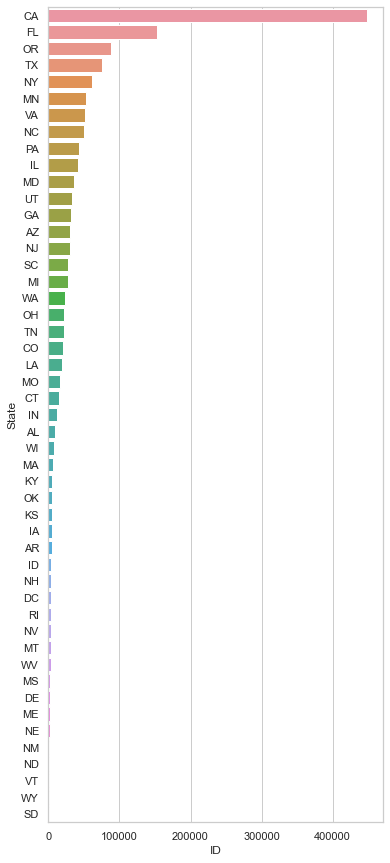

In [14]:
plt.figure(figsize=(6, 15))
sns.barplot(y="State", x="ID", data=group_state_sort)

### At what time do accidents usually occur in the US
Task Details
- Figure out the time that accidents usually occur in the US. This can be done by using the "start time" and "end time" columns.

In [15]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [16]:
dftime = df.copy()
dftime.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)','Precipitation(in)'], axis=1, inplace=True)
# dftime.dropna(axis=0)
dftime.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng  Distance(mi)                                        Description  \
0  -83.09286         3.230  Between Sawmill Rd/Exit 20 and OH-315/Olentang...   
1  -84.06280         0.747                 At OH-4/OH-235/Exit 41 - Accident.   
2  -84.52468         0.055                   At I-71/US-50/Exit 1 - Accident.   
3  -84.52341         0.219                   At I-71/US-50/Exit 1 - Accident.   
4  -81.53784         0.123                    At Dart Ave/Exit 21 - Accident.   

        Street Side  ... Roundabout Station   Stop Traffic_Calming  \
0  Outerbelt E    R  ...      False   False  False           False   
1       I-70 E    R  ...      False   False  False           False   
2       I-75 S    R  ...      False   False  False           False   
3      US-50 E    R  ...      False   False  False           False   
4       I-77 N    R  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0          False        False          Night          Night   
1          False        False          Night          Night   
2          False        False          Night          Night   
3          False        False          Night          Night   
4          False        False          Night          Night   

   Nautical_Twilight  Astronomical_Twilight  
0              Night                  Night  
1              Night                  Night  
2              Night                    Day  
3              Night                    Day  
4                Day                    Day  

[5 rows x 42 columns]

In [17]:
dftime.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                         83
County                        0
State                         0
Zipcode                     935
Country                       0
Timezone                   2302
Airport_Code               4248
Weather_Timestamp         30264
Temperature(F)            43033
Humidity(%)               45509
Pressure(in)              36274
Visibility(mi)            44211
Wind_Direction            41858
Wind_Speed(mph)          128862
Weather_Condition         44007
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [18]:
dftime = dftime.dropna(axis =0)

In [19]:
dftime.isnull().any().sum()

0

In [20]:
dftime.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

#### Brief overview of data

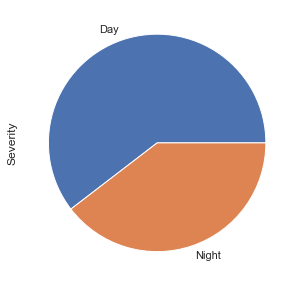

In [21]:
plt.figure(figsize =(10,5))
dftime.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

- When do accidents happen the most at day as more people are out as above.

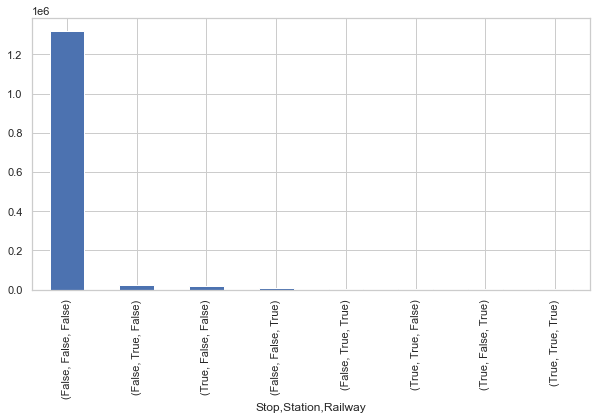

In [23]:
plt.figure(figsize =(10,5))
dftime.groupby(['Stop', 'Station', 'Railway' ])['Severity'].size().sort_values(ascending=False).plot.bar()

- When do accidents happen the most ? - They happen when the Stop sign, Station signs & railway crossings are not followed

In [24]:
plt.figure(figsize =(10,5))
dftime.groupby(['Give_Way', 'Crossing','Bump' ])['Severity'].sum().sort_values(ascending=False).plot.bar()

- When do accidents happen the most ? -they happen when Give Way, Crossing & Bumps are not seen by the driver

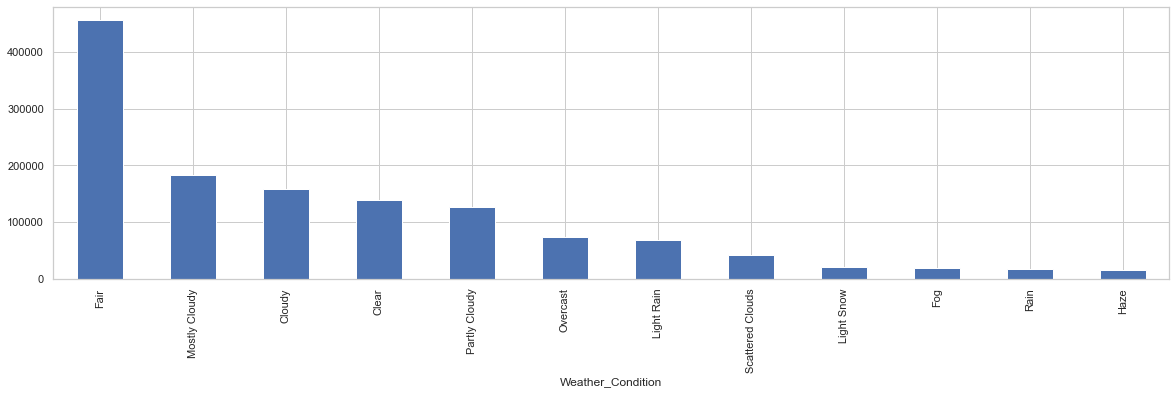

In [25]:
plt.figure(figsize =(20,5))
dftime.groupby(['Weather_Condition']).size().sort_values(ascending=False).head(12).plot.bar()


- How was the weather conditions during the accidents?




In [26]:
plt.figure(figsize =(12,5))
dftime.groupby(['Visibility(mi)']).size().sort_values(ascending=False).head(12).plot.bar()

- How was the visibility during accidents? - Max accidents happened when the visibiilty was >10 miles

- I have split the Start Time in different features like month, year, time, week day etc as example

In [27]:
import datetime
dftime['Start_Time']= pd.to_datetime(dftime['Start_Time'])
dftime['hour']= dftime['Start_Time'].dt.hour
dftime['year']= dftime['Start_Time'].dt.year
dftime['month']= dftime['Start_Time'].dt.month
dftime['week']= dftime['Start_Time'].dt.week
dftime['day']= dftime['Start_Time'].dt.day_name()
dftime['quarter']= dftime['Start_Time'].dt.quarter
dftime['time_zone']= dftime['Start_Time'].dt.tz
dftime['time']= dftime['Start_Time'].dt.time

<ipython-input-27-5574fe794f30>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dftime['week']= dftime['Start_Time'].dt.week


In [28]:
dftime.head()

ID  Severity          Start_Time             End_Time  Start_Lat  \
0  A-2716600         3 2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
5  A-2716605         3 2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   
6  A-2716606         2 2016-02-08 08:16:57  2016-02-08 14:16:57  39.063240   
7  A-2716607         2 2016-02-08 08:16:57  2016-02-08 14:16:57  39.067080   
8  A-2716608         2 2016-02-08 08:15:41  2016-02-08 14:15:41  39.775650   

   Start_Lng  Distance(mi)                                        Description  \
0 -83.092860         3.230  Between Sawmill Rd/Exit 20 and OH-315/Olentang...   
5 -84.492792         0.500                 At Mitchell Ave/Exit 6 - Accident.   
6 -84.032430         1.427                       At Dela Palma Rd - Accident.   
7 -84.058550         1.423                       At Dela Palma Rd - Accident.   
8 -84.186030         0.227                        At OH-4/Exit 54 - Accident.   

            Street Side  ... Nautical_Twilight Astronomical_Twilight hour  \
0      Outerbelt E    R  ...             Night                 Night    0   
5           I-75 S    R  ...               Day                   Day    7   
6   State Route 32    R  ...               Day                   Day    8   
7   State Route 32    R  ...               Day                   Day    8   
8           I-75 S    R  ...               Day                   Day    8   

   year month week     day quarter  time_zone      time  
0  2016     2    6  Monday       1       None  00:37:08  
5  2016     2    6  Monday       1       None  07:53:43  
6  2016     2    6  Monday       1       None  08:16:57  
7  2016     2    6  Monday       1       None  08:16:57  
8  2016     2    6  Monday       1       None  08:15:41  

[5 rows x 50 columns]

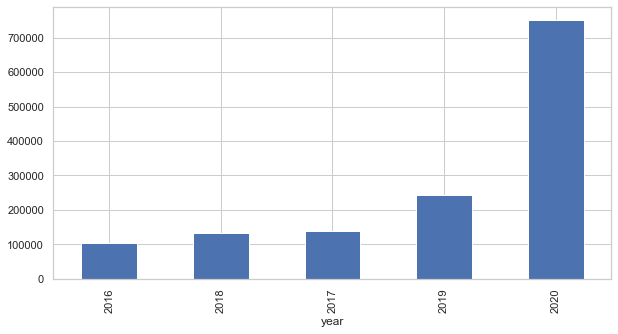

In [29]:
plt.figure(figsize =(10,5))
dftime.groupby(['year']).size().sort_values(ascending=True).plot.bar()

- How are the accident rates over the year? Increaseing........

In [30]:
plt.figure(figsize =(15,5))
dftime.groupby(['month']).size().plot.bar()

Above you can see the month wise accident stats

In [31]:
plt.figure(figsize =(15,5))
dftime.groupby(['year', 'month']).size().plot.bar()
plt.title('Number of accidents/year')
plt.ylabel('number of accidents')

Text(0, 0.5, 'number of accidents')

In [32]:
dftime.groupby(['day']).size().plot.pie(figsize=(10,10))

- from above we can see accidents are less no sunday and saturday as people are at home.

In [33]:
plt.figure(figsize =(10,5))
dftime.groupby(['hour']).size().plot.bar()
plt.title('At which hour of day accidents happen')
plt.ylabel('count of accidents')

Text(0, 0.5, 'count of accidents')

- Above Graph Shows at which time of the day the accidents are maximum, early morning during the office going time

In [34]:
dftime['day_zone'] = pd.cut((dftime['hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
plt.figure(figsize =(10,5))
dftime.groupby(['day_zone']).size().plot.bar()

- we have divided time into 4 time zone. 

### Visualize US Accidents Dataset
Task Details
- This is a countrywide traffic accident dataset, which covers 49 states of the United States. The purpose of this task is to visualize the dataset states wise.

- here some data pages with lat and lng

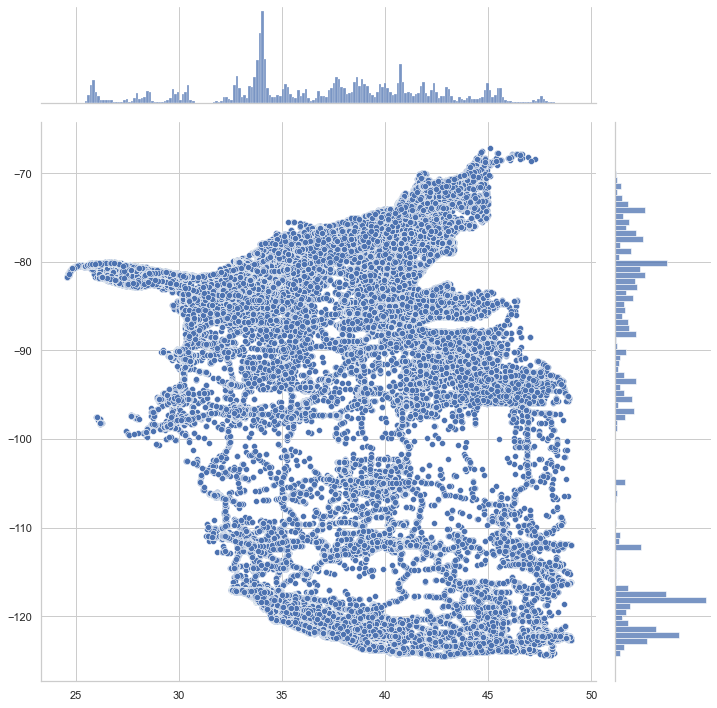

In [35]:
sns.jointplot(x=dftime.Start_Lat.values,y=dftime.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

In [36]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=0ab3bbd48c3863e14ae6af6ec35ff0b0a03b46b841100fd95ecb4e87ef142ef8
  Stored in directory: c:\users\arbaj\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [37]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True) #set up everything so that the figures show up in the notebook

In [38]:
df_st_ct = pd.value_counts(dftime['State'])
df_st_ct.head(5)

CA    406836
FL    143030
OR     78655
TX     68580
NY     56616
Name: State, dtype: int64

In [39]:
#creating data variable and layout variable
# dictionary casting
data = dict(type='choropleth',
            colorscale = 'amp',
            locations = df_st_ct.index,
            z = df_st_ct.values.astype(float),  # Data to be color-coded,
            locationmode = 'USA-states',
            text = df_st_ct,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':"Millions USD"}
            ) 

In [40]:
#layout dictionary
layout = dict(
    title = 'US Accendents by state',
   geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
)

In [41]:
choromap2 = go.Figure(data = [data],layout = layout)
iplot(choromap2)

map is not displaying we have to correct it

### Factors Affecting Accident Severity
Task Details
- Examine the relationship between accident severity and other accident information such as time, weather, and location.

In [42]:
import numpy as np
df.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  

[3 rows x 47 columns]

- We will examine the impact of 3 groups of factors on accident severity: time, weather, and infrastructure.

Severity "a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)." Here is the distribution of the severity values.

In [44]:
df["Severity"].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

- anaylising by months

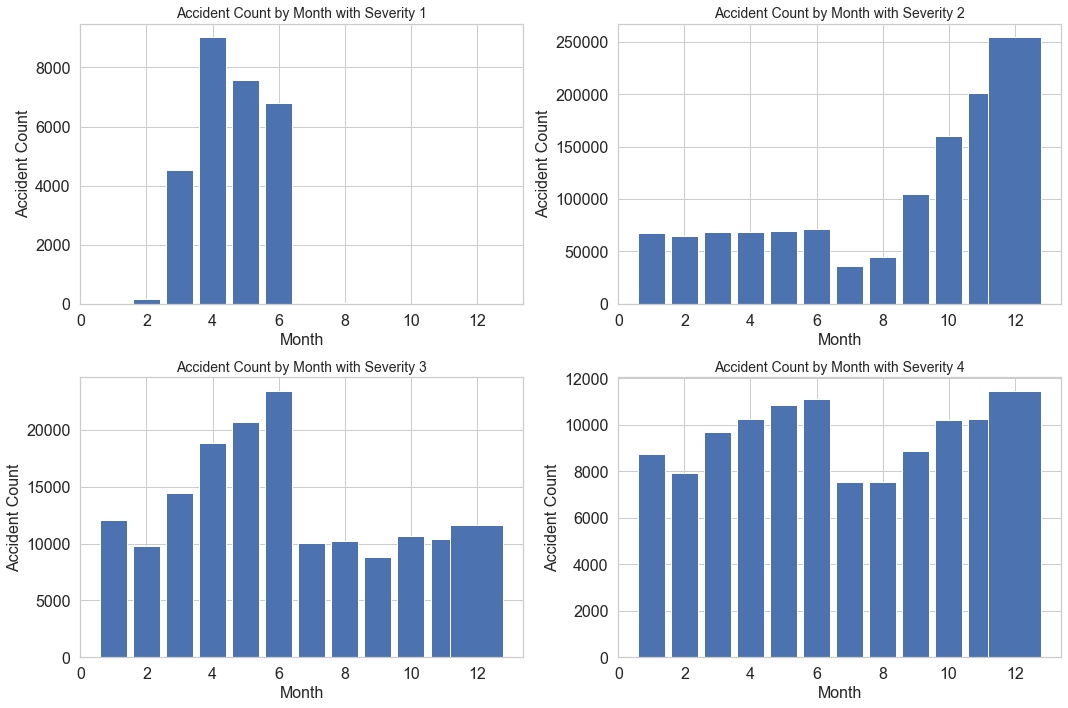

In [45]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,14], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

-From july (1) to February (12) severity 1 is converted to higher severity as due to  wether conditions(snow). While fall and winter months could be more dangerous, it is interesting that January and February have much lower accident counts.
- analysis by days

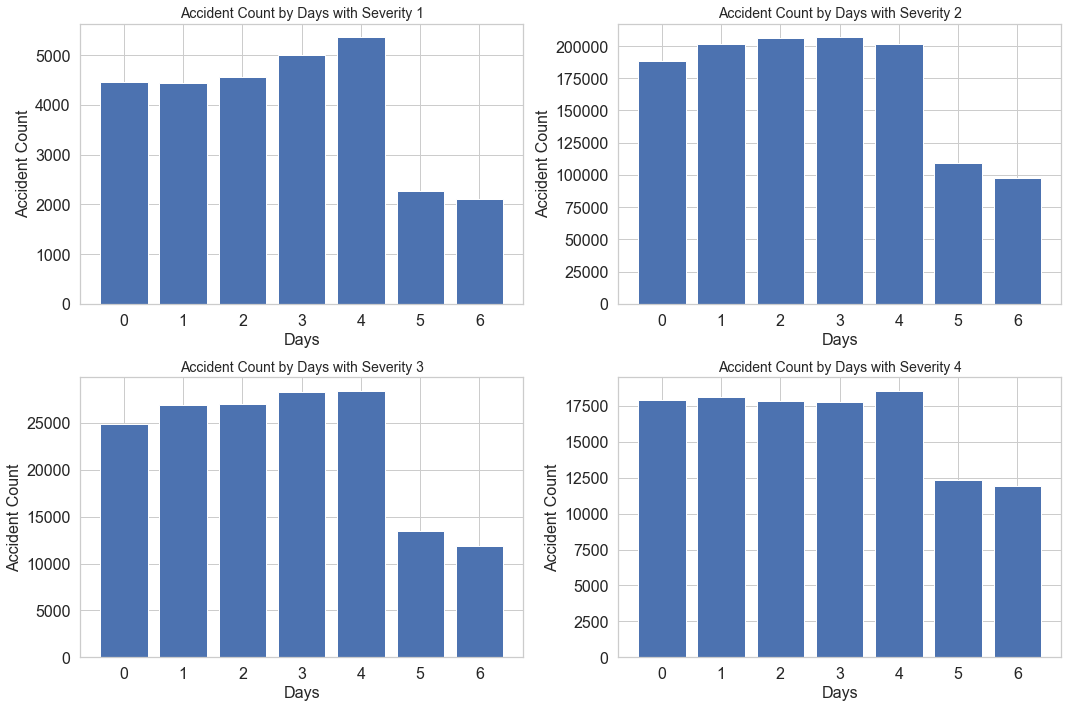

In [46]:
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).dayofweek, bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Days with Severity " + str(s), fontsize=14)
    plt.xlabel("Days", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- drop in number of accidents for all severity levels during the weekend.

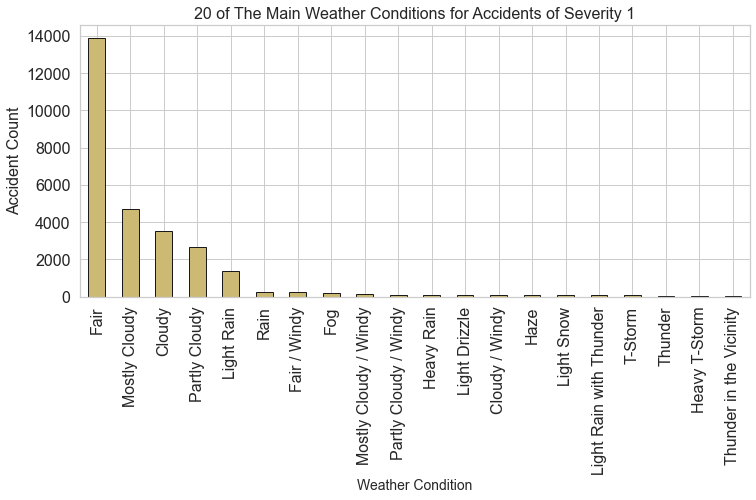

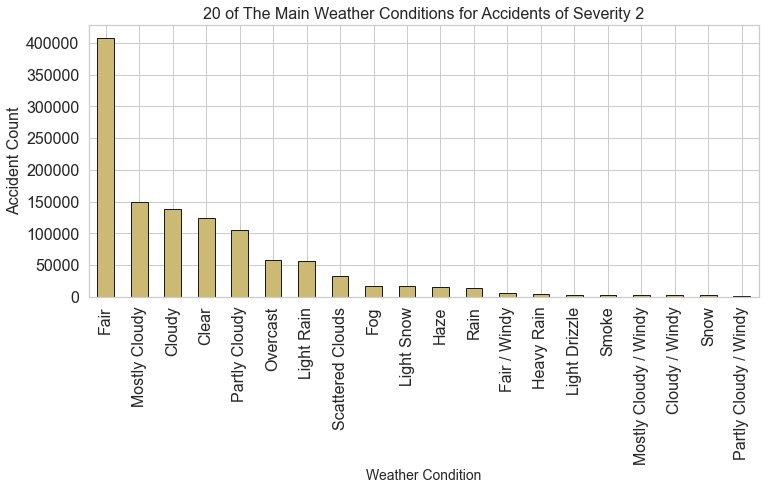

In [47]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=14)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

- Across all levels of severity, most accidents happen under clear, cloudy, fair or similar weather conditions. 

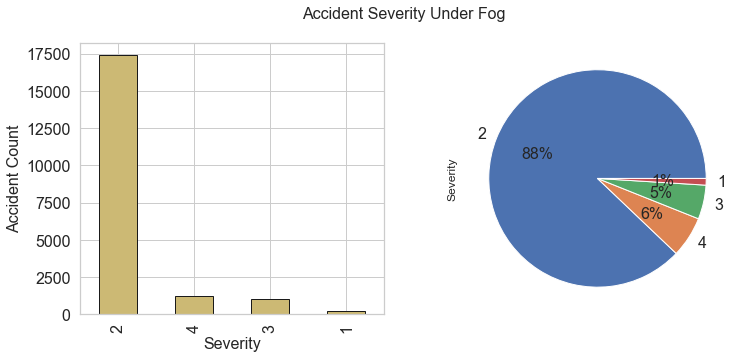

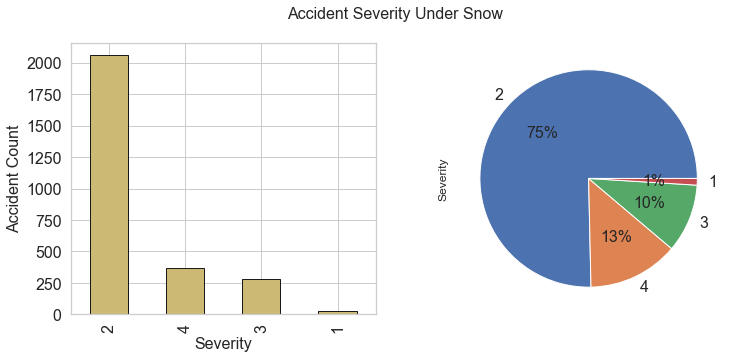

In [48]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

- The proportion of level 3 and 4 accidents increases as weather changes from fog (16%) to light rain (29%) to rain (30%) to heavy rain (31%) to snow (33%).

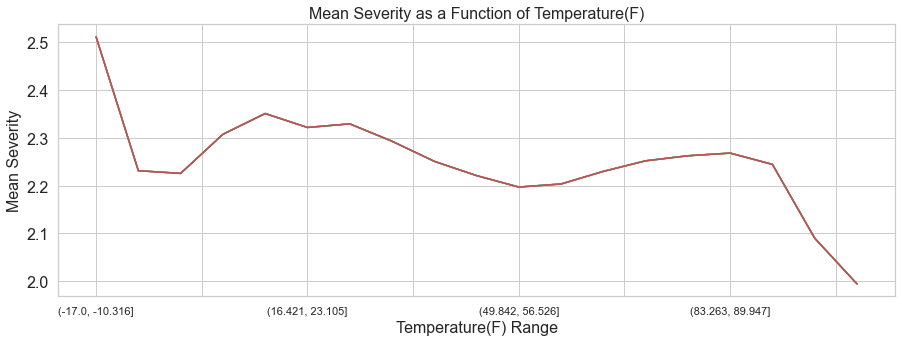

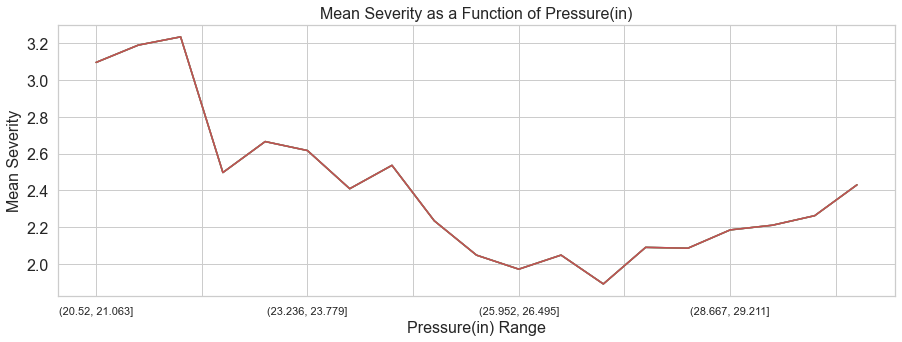

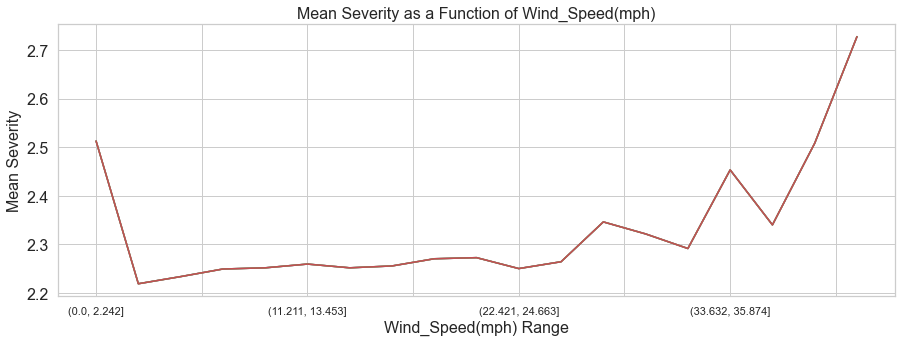

In [49]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

accidents near Infrastructure

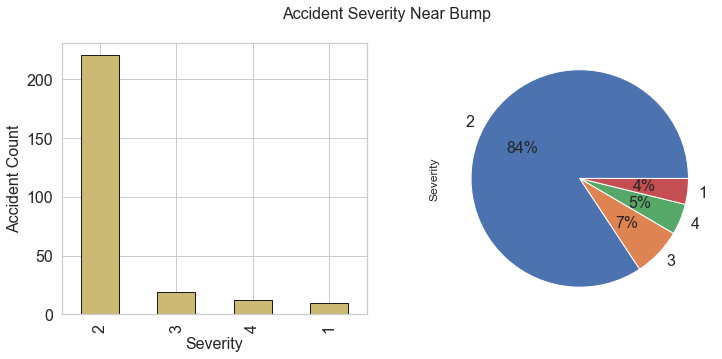

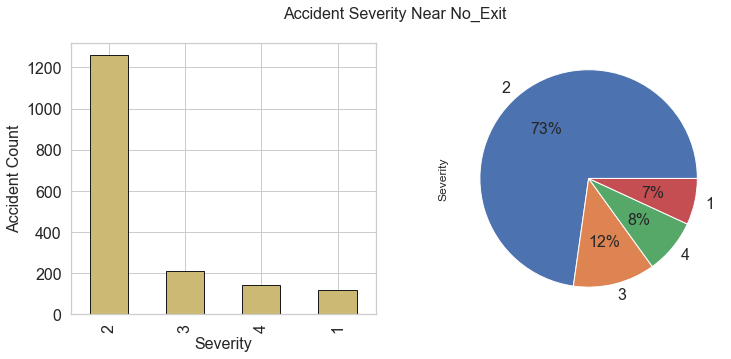

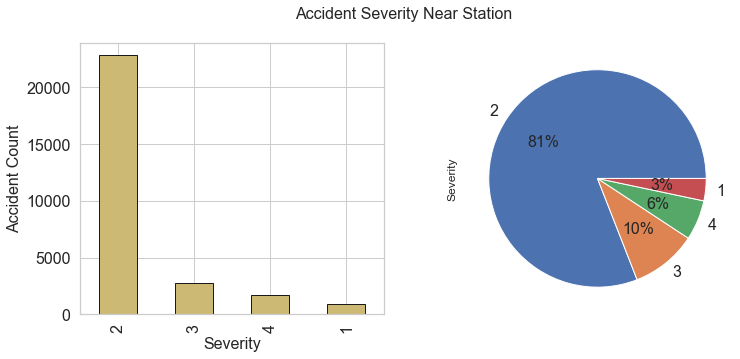

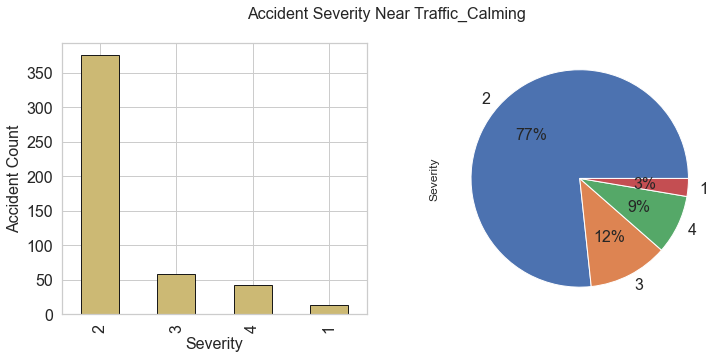

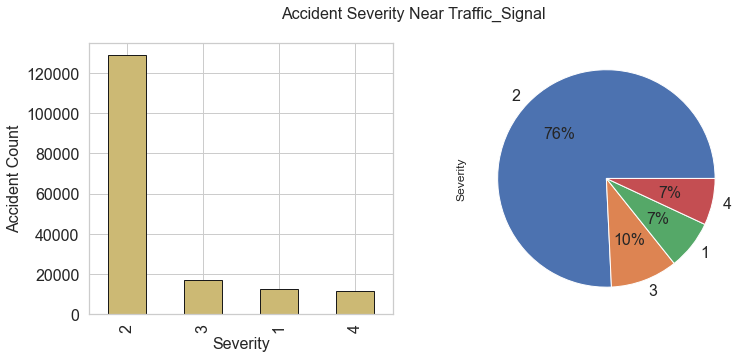

In [50]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)